In [3]:
from imports import *
import staircase as sc
%matplotlib inline
import operator
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r"../data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)

vsteps = Steps.read_dataframe(df,'enter','leave')


<AxesSubplot:>

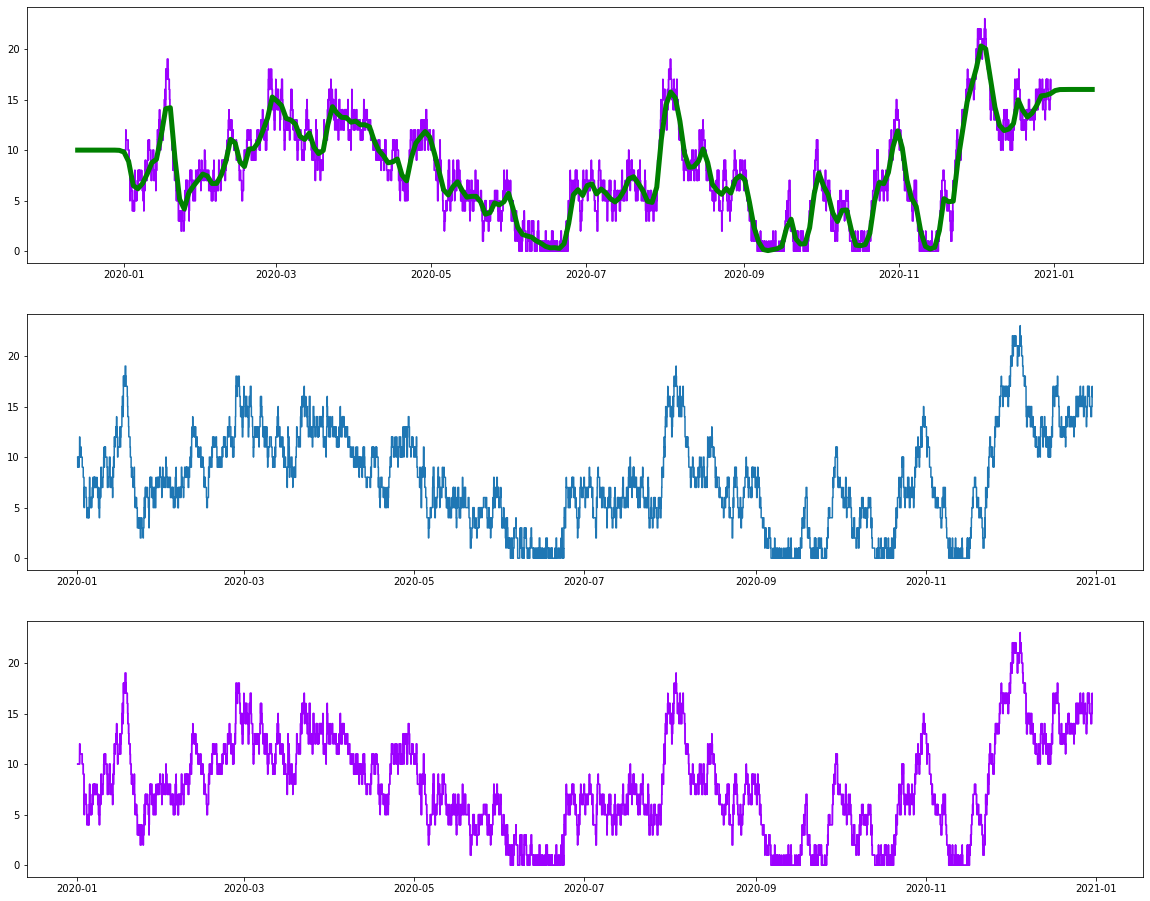

In [7]:
p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(hours=1)).astype(pd.Timestamp)
fig,ax = plt.subplots(nrows=3,figsize=(20,16))

#vsteps.rebase(tbase)
vsteps.plot(ax=ax[0])
vsteps.smooth_plot(ax=ax[0],color='g',linewidth=5)

queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)
queue.plot(ax[1])

vsteps.plot(ax=ax[2])
#print(vsteps.mean())
#print(queue.mean())


<AxesSubplot:>

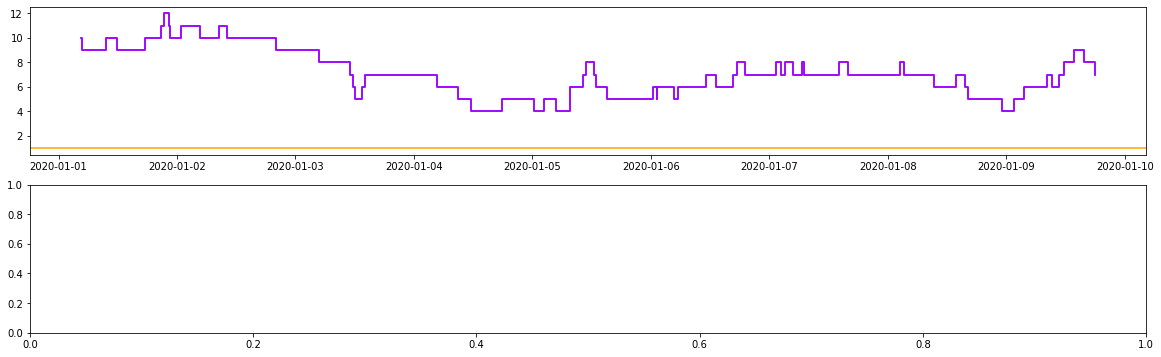

In [12]:
fig,ax = plt.subplots(nrows=2,figsize=(20,6))

vstep_clipped = vsteps.clip(lbound=pd.Timestamp(2020,1,1),ubound=pd.Timestamp(2020,1,10))

t = np.arange(pd.Timestamp(2020,1,1),pd.Timestamp(2020,1,10),pd.Timedelta(minutes=10)).astype(pd.Timestamp)

vstep_clipped.plot(ax=ax[0])
vstep_clipped.normalise().plot(ax=ax[0],color='orange')
#ax[0].step(t,vstep_clipped.normalise().step(t),color='orange')

In [10]:
vn = vstep_clipped.normalise()
vn.step_keys()

[-inf]